# CHAP6 차원 축소

- PCA, LDA, SVD, NMF
- 차원 축소 : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 차원이 증가할수록
    - 데이터 포인트 간의 거리가 기하급수적으로 멀어짐
    - 희소(sparse)한 구조
    - 예측 신뢰도↓
    - 개별 피처 간 상관관계↑
    - 다중 공선성 문제로 모델 예측 성능 저하
- 3차원 이하의 차원 축소를 통해 시각적으로 데이터 압축해 표현 가능
- 학습 데이터 크기자 줄어들어 학습에 필요한 처리 능력 감소 가능

- 피처 선택(feature selection)
    - 특정 피처에 종속성이 강한 불필요한 피처 제거
    - 데이터의 특징을 잘 나타내는 주요 피처만 선택
- 피처 추출(feature extraction)
    - 기존 피처를 저차원의 중요 피처로 압축해 추출
    - 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출
    - ex) 모의고사 성적, 종합 내신성적, 수능성적, 봉사활동, 대외활동, 수상경력 등 ⇒ 학업 성취도, 커뮤니케ㅇ션 능력, 문제 해결력
    - 잠재적인 요소(Latent Factor)을 추출하는 것
    - PCA, SVD, NMF

- 이미지
    - 이미지 분류 등의 분류 수행 시 과적합 영향력↓
    - 이미지 자체가 가지고 있는 차언 수가 너무 크기 때문
- 텍스트 문서
    - 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 찾을 수 있음
    - SVD, NMF : 시맨틱 토픽 모델링을 위한 알고리즘

## PCA(Principal Component Analysis)

- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 차원 축소 시 기존 데이터의 정보 유실을 최소화하기 위해 가장 높은 분산을 가지는 데이터의 축(=PCA의 주성분)을 찾아 차원 축소
- 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성
- 두 번째 축은 첫번째 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로
- 세 번재 축은 다시 두 번째 축과 직각이 되는 벡터를 축으로
- 이러한 벡터 축에 원본 데이터 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터 차원 축소됨
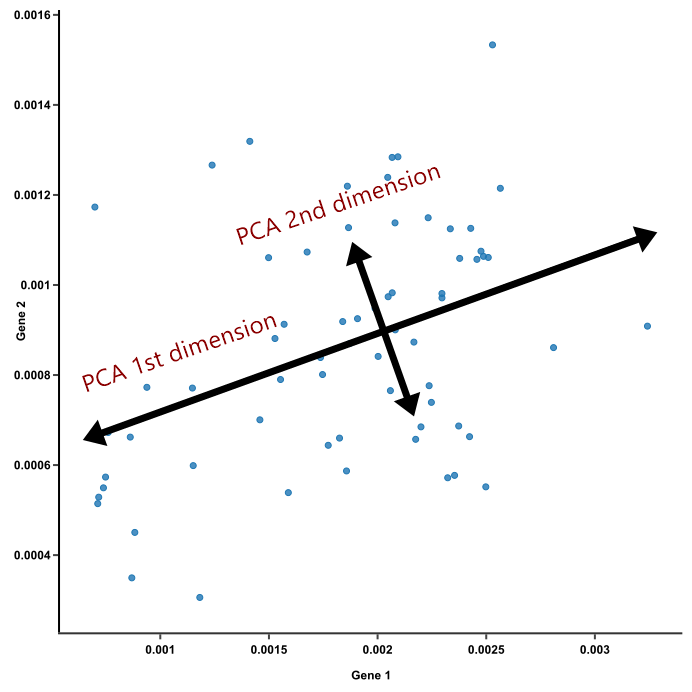

- 입력 데이터의 공분산 행렬을 고유값 분해
- 고유벡터에 입력 데이터 선형 변환
- 고유벡터 = PCA의 주성분 벡터로 입력 데이터의 분산이 큰 방향 나타냄
- 고유값(eigenvalue) : 고유벡터의 크기, 입력 데이터의 분산

- 선형 변환
    - 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것
    - 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 것
- 공분산 행렬
    - 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
    - 정방행렬(Diagonal Matrix) : 열과 행이 같은 행렬
    - 대칭행렬(Symmetric Matrix) : 정방행렬 중 대각 원소를 중심으로 원소 값이 대칭되는 행렬
    - 고유벡터를 직교행렬(orthogonal matrix)로 고유값을 정방 행렬로 대각화할 수 있음
- 고유 벡터
    - 행렬 A를 곱하더라도 방향이 변하지 않고 크기만 변하는 벡터
    - 여러 개 존재
    - 정방 행렬은 최대 그 차원 수만큼의 고유벡터 가질 수 있음
    - ex) 2x2 행렬은 2개의 고유벡터, 3x3 행렬은 3개의 고유벡터
    - 행렬이 작용하는 힘의 방향과 관계가 있어 행렬을 분해하는데 사용

- 입력데이터의 공분산 행렬이 고유벡터와 고유값으로 분해
- 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA!

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

#### 붓꽃 데이터 세트로 PCA 살펴보기

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


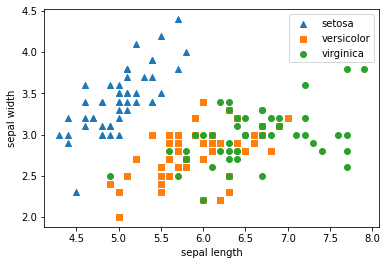

In [3]:
# 분포 2차원으로 시각화
# setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

# setosa target 값 0, versicolor 1, virginica 2
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

4개 속성을 2개로 압축한 뒤 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화

In [4]:
# 각 속성값을 동일한 스케일로 변환
from sklearn.preprocessing import StandardScaler

In [5]:
# 타겟 값 제외한 모든 속성 값을 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [6]:
# 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 속성) PCA 데이터로
# n_components : PCA로 변환할 차원의 수
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# DateFrame
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


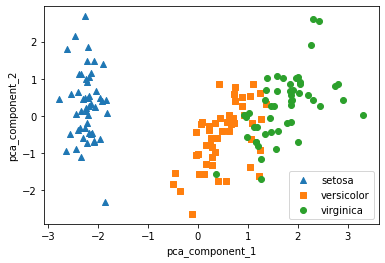

In [9]:
# PCA 변환된 데이터 세트 2차원상에서 시각화
# pca_component_1 : X축, pca_component_2 : Y축
# setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- 첫 번재 새로운 축인 pca_component_1이 원본 데이터의 변동성 잘 반영

In [10]:
# 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- pca_component_1 : 72.9%
- pca_component_2 : 22.8%
- 이 둘만으로 95%의 원본 데이터 변동성 설명 가능

In [11]:
# 원본 붓꽃 데이터에 Random Forest 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [12]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3) # 3개의 교차 검증 세트로 정확도 비교
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [13]:
# 4차원->2차원 PCA 변환한 데이터 세트에 Random Forest 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 대비 정확도 10% 하락
- 4개의 속성 -> 2개 : 속성 개수가 50% 감소한 것 고려하면 PCA 변환 후에도 원본 데이터 특성 대부분 유지하고 있음

#### 신용카드 고객 데이터 세트(더 많은 피처)

In [14]:
import pandas as pd

In [16]:
df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:] # 첫 행 제거, iloc으로 기존 id 제거
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- 30000개의 레코드, 24개 속성
- defualt payment next month = Target 값
    - 1 : 연체
    - 0 : 정상납부

- PAY_0 → PAY_1
- default payment next month → default

In [17]:
df.rename(columns={'PAY_o':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [18]:
# 각 속성별 상관도 보기
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

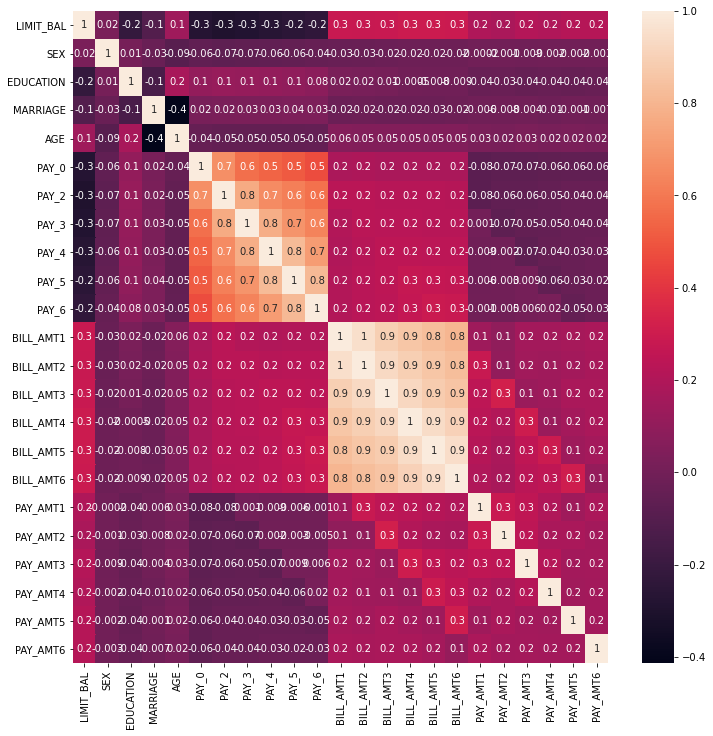

In [21]:
corr = X_features.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT의 6개 속성끼리 상관도가 대부분 0.9 이상으로 매우 높음
- PAY의 6개의 속성 역시 상관도 높음

- BILL_AMT의 6개의 속성을 2개의 컴포넌트로 PCA 변환

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 2개의 컴포넌트만으로 6개 속성의 변동성을 95% 이상 설명할 수 있음

In [24]:
# 원본 데이터 세트로 RandomForest 적용
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [25]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트로 RandomForest 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

CV=3인 경우의 PCA 변환 데이터 교차 검증 개별 정확도: [0.7921 0.7962 0.8023]
PCA 변환 데이터 평균 정확도: 0.7968666666666667


- 전체 23개 속성에 비해 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생

- 주로 컴퓨터 비전 분야, 얼굴 인식 분야에 사용

## LDA(Linear Discriminant Analysis

- 선형 판별 분석법
- 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축 찾음
- *PCA - 입력 데이터의 변동성의 가장 큰 축 찾음
- 클래스 간 분산(betwween-class-scatter), 클래스 내부 분산(within-class scatter)의 비율 최대화하는 방식으로 차원 축소
- 클래스 간 분산 최대한 크게, 클래스 내부 분산 최대한 작게

1. 클래스 내부와 클래스 간 분산 행렬 구함 → 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터 기반으로
2. 클래스 내부 분산 행렬, 클래스 간 분산 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

### 붓꽃 데이터 세트에 LDA 적용하기

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

- 2개의 컴포넌트로 LDA 변환
- 지도학습이기 때문에 변환 시 클래스 결정값 필요

In [28]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 클래스 결정값 입력
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [29]:
# 품종별로 시각화
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

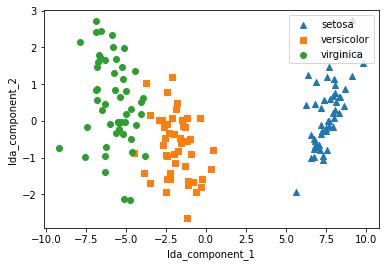

In [31]:
lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## SVD(Singular Value Decomposition)

- 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능
- 특이값 분해
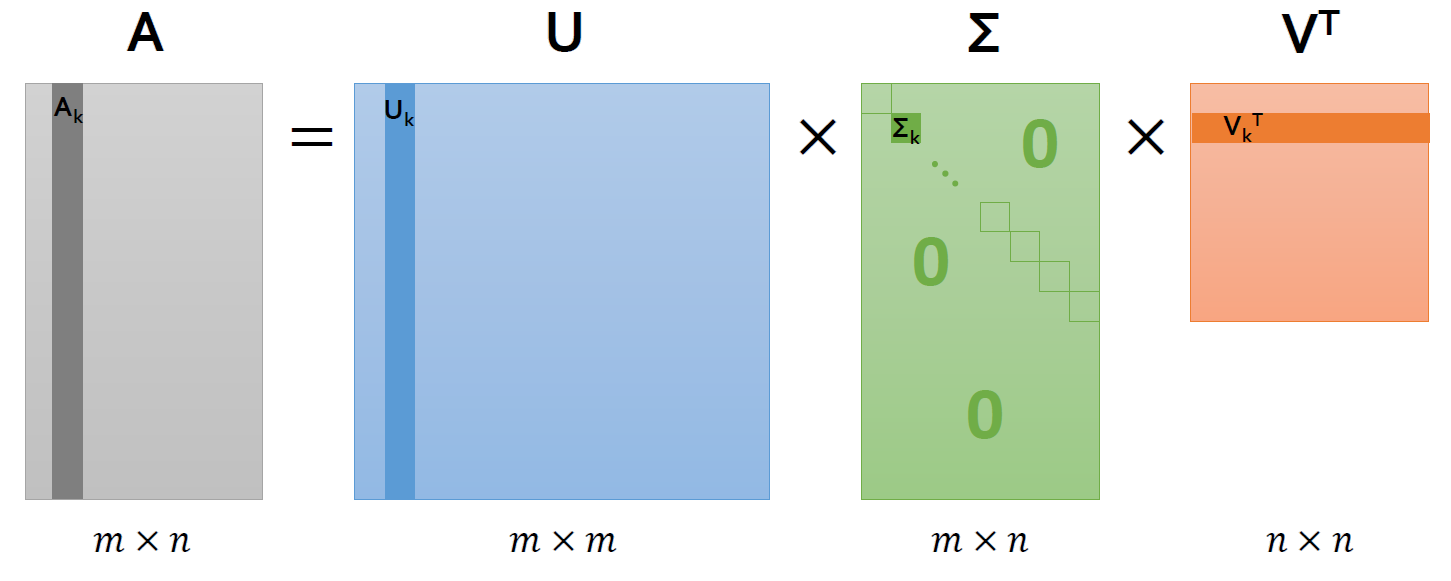
- 행렬 U와 V에 속한 벡터 = 특이벡터(singular vector)
- 모든 특이벡터는 서로 직교
- ∑ = 대각행렬, 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
- ∑이 위치한 0이 아닌 값이 바로 행렬 A의 특이값

- Truncated SVD : ∑의 대각원소 중 상위 몇 개만 추출해 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것

In [32]:
# SVD 연산+분해
import numpy as np
from numpy.linalg import svd

In [33]:
# 4X4 랜덤 행렬 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [35]:
# SVD 적용해 U, ∑, Vt 도출
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3)) # 대각요소만 0이 아니고 나머지는 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현
print('Vt matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [36]:
# 분해된 값들을 이용해 다시 원본 행렬로 복원
# Sigma 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt) # 내적으로 복원
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 데이터 세트의 로우 간에 의존성이 있을 경우

In [37]:
# 세 번재 로우 = 첫 번째 + 두 번째
# 네 번째 로우 = 첫 번째
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [38]:
# SVD 수행
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3)) # 대각요소만 0이 아니고 나머지는 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- Sigma 값 중 2개가 0 = 선형 독립인 로우 벡터의 개수가 2개 = Rank가 2

In [40]:
# Sigma의 0에 대응하는 U, Sigma, Vt 데이터 제외하고 복원
U_ = U[:, :2] # 앞 2열
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2] # 앞 2행
print(U_.shape, Sigma_.shape, Vt_.shape)
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [41]:
# Truncated SVD
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [44]:
# 6X6 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma 값 행렬:', Sigma)

# 특이값 4개로 해 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7267323

- 근사적으로 복원

### 사이킷런 TruncatedSVD 클래스 이용한 변환

In [45]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'TruncatedSVD Component 2')

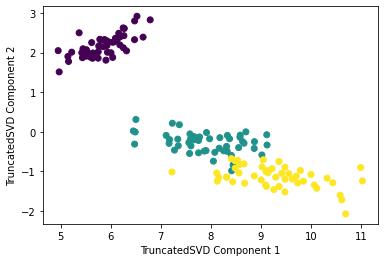

In [46]:
iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2) # 주요 컴포넌트 2개로
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

In [47]:
# 스케일링 후 TruncatedSVD와 PCA 비교
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'PCA Transformed')

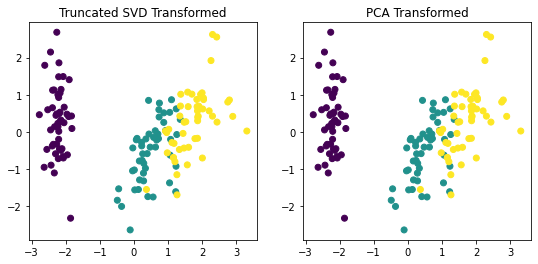

In [48]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 거의 같음!
- PCA가 SVd 알고리즘으로 구혔됐음
- but PCA : 밀집 행렬에 대한 변환만
- SVD : + 희소 행렬에 대한 변환도 가능
- SVD : 이미지 압축을 통한 패턴 인식, 신호 처리 분야, LSA(텍스트의 토픽 모델링 기법)

## NMF(Non-Negative Matrix Factorization)

- 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- 원본 행렬 내 모든 원소 값이 모두 양수(0 이상)이라는 게 보장되면 더 간단하게 양수 행렬로 분해될 수 있음
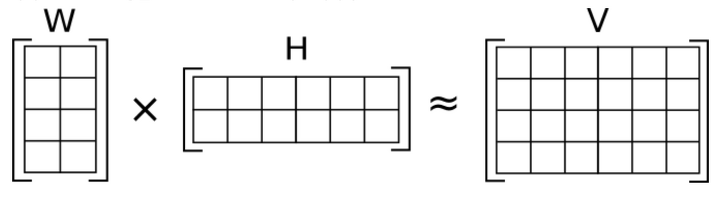
- W : 원본 행에 대해 이 잠재 요솧의 값이 얼마나 되는지에 대응
- H : 이 잠재 요소가 원본 열로 어떻게 구성됐는지

In [49]:
# NMF 이용해 2개의 컴포넌트로 변환 후 시각화
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'NMF Component 2')

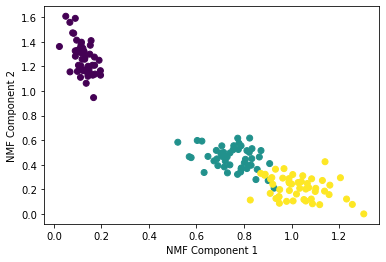

In [50]:
iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- NMF : 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링, 추천 영역